# Simulating Airfoil Self-Noise using Neural Networks

Source - https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise

## Dataset Description
* Built using the results of a series of aerodynamic and acoustic tests on sections of aerodynamic blades performed in an anechoic wind tunnel
* Features - 
  * Number of instances - 1503
  * Number of attributes - 6
  * Dataset characteristics - Multivariate
  * Attribute characteristics - Real
* Attributes - 
  * `Frequency` - Frequency in Hertz(Hz)
  * `AngleAttack` - Angle of Attack in degrees
  * `ChordLength` - Chord Length in meters
  * `FSVelox` - Free stream velocity in metres per second
  * `SSDT` - Suction side displacement thickness in meters
  * `SSP` - Scaled sound pressure level in decibels(target)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

# Listing the attribute names
ASNNames = ['Frequency',
            'AngleAttack',
            'ChordLength',
            'FSVelox',
            'SSDT',
            'SSP']

ASNData = pd.read_csv('/content/drive/MyDrive/airfoil_self_noise.dat', delim_whitespace=True, names=ASNNames)
ASNData

,Frequency,AngleAttack,ChordLength,FSVelox,SSDT,SSP
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


In [3]:
ASNData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Frequency    1503 non-null   int64  
 1   AngleAttack  1503 non-null   float64
 2   ChordLength  1503 non-null   float64
 3   FSVelox      1503 non-null   float64
 4   SSDT         1503 non-null   float64
 5   SSP          1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


In [4]:
basic_stats = ASNData.describe()
basic_stats = basic_stats.transpose()
basic_stats

,count,mean,std,min,25%,50%,75%,max
Frequency,1503.0,2886.380572,3152.573137,200.000000,800.000000,1600.000000,4000.000000,20000.000000
AngleAttack,1503.0,6.782302,5.918128,0.000000,2.000000,5.400000,9.900000,22.200000
ChordLength,1503.0,0.136548,0.093541,0.025400,0.050800,0.101600,0.228600,0.304800
FSVelox,1503.0,50.860745,15.572784,31.700000,39.600000,39.600000,71.300000,71.300000
SSDT,1503.0,0.011140,0.013150,0.000401,0.002535,0.004957,0.015576,0.058411
SSP,1503.0,124.835943,6.898657,103.380000,120.191000,125.721000,129.995500,140.987000


## Scaling using Scikit-Learn

* As there is high range of variability in the predictor variables, the predictors having a larger range could influence the system response more as compared to the predictors having small numerical ranges
* This can impact the accuracy of the predictions and can reduce the sensitivity of the model
* To avoid this, we can reduce the values so that they fall within a common range using **feature scaling**

$x_{scaled}$ = $\frac{x - x_{min}}{x_{max}-x_{min}}$

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler_object = MinMaxScaler()
# print(scaler_object.fit(ASNData))
ASNDataScaled = scaler_object.fit_transform(ASNData)
ASNDataScaled = pd.DataFrame(ASNDataScaled, columns=ASNNames)
ASNDataScaled

,Frequency,AngleAttack,ChordLength,FSVelox,SSDT,SSP
0,0.030303,0.000000,1.000000,1.000000,0.039005,0.606829
1,0.040404,0.000000,1.000000,1.000000,0.039005,0.580238
2,0.053030,0.000000,1.000000,1.000000,0.039005,0.600181
3,0.070707,0.000000,1.000000,1.000000,0.039005,0.643790
4,0.090909,0.000000,1.000000,1.000000,0.039005,0.640333
...,...,...,...,...,...,...
1498,0.116162,0.702703,0.272727,0.199495,0.904111,0.183051
1499,0.148990,0.702703,0.272727,0.199495,0.904111,0.156194
1500,0.191919,0.702703,0.272727,0.199495,0.904111,0.085729
1501,0.242424,0.702703,0.272727,0.199495,0.904111,0.075624


In [6]:
summary = ASNDataScaled.describe()
summary = summary.transpose()
summary

,count,mean,std,min,25%,50%,75%,max
Frequency,1503.0,0.135676,0.159221,0.0,0.030303,0.070707,0.191919,1.0
AngleAttack,1503.0,0.305509,0.266582,0.0,0.090090,0.243243,0.445946,1.0
ChordLength,1503.0,0.397810,0.334791,0.0,0.090909,0.272727,0.727273,1.0
FSVelox,1503.0,0.483857,0.393252,0.0,0.199495,0.199495,1.000000,1.0
SSDT,1503.0,0.185125,0.226687,0.0,0.036794,0.078550,0.261594,1.0
SSP,1503.0,0.570531,0.183441,0.0,0.447018,0.594065,0.707727,1.0


## Visualizing the data using matplotlib

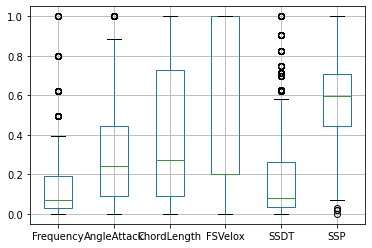

In [7]:
import matplotlib.pyplot as plt

boxplot = ASNDataScaled.boxplot(column=ASNNames)
plt.show()

In [8]:
# Measuring the correlation coefficients

CorASNData = ASNDataScaled.corr(method='pearson')
CorASNData

,Frequency,AngleAttack,ChordLength,FSVelox,SSDT,SSP
Frequency,1.000000,-0.272765,-0.003661,0.133664,-0.230107,-0.390711
AngleAttack,-0.272765,1.000000,-0.504868,0.058760,0.753394,-0.156108
ChordLength,-0.003661,-0.504868,1.000000,0.003787,-0.220842,-0.236162
FSVelox,0.133664,0.058760,0.003787,1.000000,-0.003974,0.125103
SSDT,-0.230107,0.753394,-0.220842,-0.003974,1.000000,-0.312670
SSP,-0.390711,-0.156108,-0.236162,0.125103,-0.312670,1.000000


Highest correlation between predictors and response(SSP) is shown by
1. Frequency = -0.39
2. SSDT = -0.313

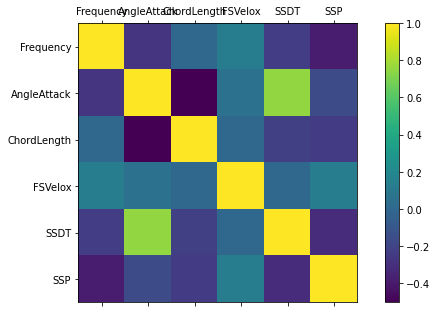

In [9]:
# Using a correlogram to visually see the correlation
plt.figure(figsize=(10,5))
plt.matshow(CorASNData, fignum=1)
plt.xticks(range(len(CorASNData.columns)), CorASNData.columns)
plt.yticks(range(len(CorASNData.columns)), CorASNData.columns)
plt.colorbar()
plt.show()

## Training the data

* Data splitting using `train_test_split()` and a 70-30 train test split

In [10]:
from sklearn.model_selection import train_test_split
X = ASNDataScaled.drop('SSP', axis=1)
X.shape

(1503, 5)

In [11]:
Y = ASNDataScaled['SSP']
Y.shape

(1503,)

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=5)
X_train.shape

(1052, 5)

## Linear Regression using sklearn

Establishing a baseline using Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression

l_model = LinearRegression()

l_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
y_pred_l_model = l_model.predict(X_test)

In [15]:
# Evaluation using Mean Squared error
from sklearn.metrics import mean_squared_error

mse_l_model = mean_squared_error(Y_test, y_pred_l_model)
mse_l_model

0.015826467113949756

## Using a multilayer perceptron based model - MLPRegressor()

* This regressor proceeds iteratively in the data training
* At each step it calculates the partial derivatives of the loss function with respect to the model parameters and updates the parameters using the results
* Regularization is added to the loss function to reduce model parameters to avoid data overfitting
* `MLPRegressor()` optimizes the squared loss by using a limited memory version of the **Broyden-Fletcher-Goldfarb-Shanno** algorithm or stochastic gradient descent

In [16]:
from sklearn.neural_network import MLPRegressor

MLPRegModel = MLPRegressor(hidden_layer_sizes=(50),
                           activation='relu', solver='lbfgs',
                           tol=1e-4, max_iter=10000, random_state=0)

MLPRegModel.fit(X_train, Y_train)
y_pred_mlpreg = MLPRegModel.predict(X_test)

The mean square error for the Neural Network(error = 0.003) is much lower than the baseline set by Linear Regression(error = 0.015)

In [17]:
# Evaluating the model
mse_mlp = mean_squared_error(Y_test, y_pred_mlpreg)
mse_mlp

0.0033909050497090906

## Comparing the two models visually

* Two scatter plots -
  1. Neural Network Model
  2. Linear Regression(baseline)
* The axes -
  * Actual Values(expected)
  * Predicted Values

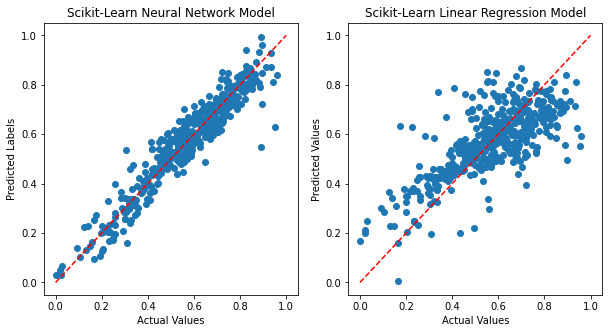

In [20]:
# SKLearn Neural Network diagram
plt.figure(figsize=(10,5))
plt.figure(1)
plt.subplot(121)
plt.scatter(Y_test, y_pred_mlpreg)
plt.plot((0, 1), "r--")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Labels")
plt.title("Scikit-Learn Neural Network Model")

# SKLearn Linear Regression
plt.subplot(122)
plt.scatter(Y_test, y_pred_l_model)
plt.plot((0,1), "r--")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scikit-Learn Linear Regression Model")

plt.savefig('/content/drive/MyDrive/airflow_noise_models_comparison.png')
plt.show()

## Conclusion

By observing the graphs above, we see that the points for the neural network graph lie much closer to the dotted line(bisector line) as compared to the graph for the linear regression model. This confirms that the predictions made by the neural network model are closer to the actual values as compared to those made by the linear model.

<Figure size 432x288 with 0 Axes>